In [1]:
%matplotlib inline

In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

"""
Bigger plots; easier to see.
"""
plt.rcParams['figure.figsize'] = (16,6)

In [3]:
"""
##############################################################################################

PROBLEM STATEMENT:

    Take the observations of avian habitat in Seward Peninsula, Alaska, and plot it visually to 
    better see the variation that exists (2012). The aim is to emphasize the variations and bring 
    out strong patterns across several sites. What variations exist and what will the patterns 
    look like? Let's find out.
    
##############################################################################################

NOTE:

    Some features were diliberately omitted in order to look specifically at habitat variety and richness.
    Specifically, 
    
        1. Site (Unique identifier for bird survey and habitat survey location),
        2. Observer, (Initials of primary observer),
        3. Subpoint, (Subsample identifier, 10-15 subsample plots associated with each site) and
        4. VOR (Visual Obstruction Reading assessed at 2 meters and 0.5 meters from ground)
    
    were omitted.

##############################################################################################

FEATURES: 

        PDB: Percent cover of dwarf birch (Betula spp.) within 0.5 meter square sampling frame.
        DBHT: Height in centimeters of the tallest dwarf birch (Betula spp.) plant within 0.5 meter square sampling frame.
        PW: Percent cover of willow (Salix spp.) within 0.5 meter square sampling frame.
        WHT: Height in centimeters of the tallest willow (Salix spp.) plant within 0.5 meter square sampling frame.
        PE: Percent cover of ericaceous (Ericaceae)shrub within 0.5 meter square sampling frame.
        EHT: Height in centimeters of the tallest ericaceous (Ericaceae) plant within 0.5 meter square sampling frame.
        PA: Percent cover of alder (Alnus spp.) within 0.5 meter square sampling frame.
        AHt: Height in centimeters of the tallest alder (Alnus spp.) plant within 0.5 meter square sampling frame.
        PH: Percent cover of herbaceous plants within 0.5 meter square sampling frame.
        PL: Percent cover of lichens (e.g., Cetraria, Cladina, Cladonia, Xanthoria, Umbilicaria spp.) within 0.5 meter 
        square sampling frame.
        LHt: Height in centimeters of the tallest lichen (e.g., Cetraria, Cladina, Cladonia, Xanthoria, Umbilicaria spp.) 
        within 0.5 meter square sampling frame.
        PB: Percent cover of bare ground or rock within 0.5 meter square sampling frame.
"""

##############################################################################################

"""
Load Data
"""
avian_habitat_df = pd.read_csv('../../../BISON/Avian_Habitat.csv')
avian_habitat_df = avian_habitat_df[['PDB', 'DBHt', 'PW', 'WHt', 'PE', 'EHt', 'PA', 'AHt', 'PH', 'HHt', 'PL', 'LHt']]
avian_habitat_df.head(10)

,PDB,DBHt,PW,WHt,PE,EHt,PA,AHt,PH,HHt,PL,LHt
0,3,5.2,0,0.0,4,2.9,0,0.0,4,3.0,0,0.0
1,2,3.1,3,4.7,3,4.1,0,0.0,3,3.5,2,1.0
2,4,5.5,1,5.8,3,3.9,0,0.0,3,7.5,0,0.0
3,3,6.2,0,0.0,3,4.0,0,0.0,4,5.0,0,0.0
4,4,5.4,0,0.0,3,3.5,0,0.0,4,3.7,0,0.0
5,3,4.0,0,0.0,3,4.1,0,0.0,2,3.5,0,0.0
6,3,5.2,2,6.3,2,2.6,0,0.0,4,5.8,0,0.0
7,2,4.4,1,4.1,2,4.3,0,0.0,5,8.2,0,0.0
8,2,5.7,1,5.7,2,5.2,0,0.0,4,6.9,0,0.0
9,2,4.8,0,0.0,1,1.7,0,0.0,5,5.7,0,0.0


In [4]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(avian_habitat_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [5]:
T = pca.transform(avian_habitat_df)

In [6]:
avian_habitat_df.shape

(1070, 12)

In [7]:
T.shape

(1070, 2)

In [8]:
avian_habitat_df.head()

,PDB,DBHt,PW,WHt,PE,EHt,PA,AHt,PH,HHt,PL,LHt
0,3,5.2,0,0.0,4,2.9,0,0.0,4,3.0,0,0.0
1,2,3.1,3,4.7,3,4.1,0,0.0,3,3.5,2,1.0
2,4,5.5,1,5.8,3,3.9,0,0.0,3,7.5,0,0.0
3,3,6.2,0,0.0,3,4.0,0,0.0,4,5.0,0,0.0
4,4,5.4,0,0.0,3,3.5,0,0.0,4,3.7,0,0.0


In [9]:
T

array([[ 0.39651293, -0.1783482 ],
       [ 3.73968161, -1.35057511],
       [ 6.27013582, -1.19863089],
       ..., 
       [ 7.14438813, -2.30055886],
       [ 8.0328989 , -2.20603881],
       [ 1.58209767,  0.04192042]])

In [10]:
"""
Use the explained_variance_ratio_ method of the principle component analysis object 
to see how much of the variance is explained by each principal component vector.
"""

pca.explained_variance_ratio_

array([ 0.31832912,  0.1939414 ])

In [11]:
"""
Interpret Components

Access the correlations between the components and original 
variables with the components_ method of the PCA object.

To interpret, find the most highly-correlated components 
(0.5 for this set).
"""

components = pd.DataFrame(pca.components_, columns = avian_habitat_df.columns, index=[1, 2])
components

,PDB,DBHt,PW,WHt,PE,EHt,PA,AHt,PH,HHt,PL,LHt
1,0.023047,0.123506,0.316113,0.696290,-0.242484,0.077551,0.020292,0.090952,0.272431,0.313628,-0.390074,-0.035104
2,-0.036166,-0.033924,-0.092713,-0.188648,-0.113426,-0.032149,0.200300,0.943495,0.023157,0.034403,-0.085189,-0.013362


In [12]:
"""
Determine which feature has the greatest effect 
on multi-dimensional scaling; apply a function.
"""

def get_important_features(transformed_features, components_, columns):
    num_columns = len(columns)

    """
    Scale principal components by max value in transformed set belonging to component.
    """
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    """
    Sort (original) columns by length.
    """
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Present features by importance:\n\n", important_features)

get_important_features(T, pca.components_, avian_habitat_df.columns.values)

Present features by importance:

 [(29.89552606265639, 'AHt'), (14.798297612916356, 'WHt'), (8.050751975331178, 'PL'), (6.811568459524109, 'PW'), (6.347851246916938, 'PA'), (6.1959572169750405, 'HHt'), (5.925556551932991, 'PE'), (5.348822904957743, 'PH'), (2.6308100481559027, 'DBHt'), (1.8190497982020237, 'EHt'), (1.2286384679911566, 'PDB'), (0.8029632943933437, 'LHt')]


In [13]:
"""
FINDINGS:

The most significant features for this PCA: AHt, WHt, PL (major outliers),
PW, PA, HHt, PE and PH; compare to examination of components_ (above).

Plot Results
"""

plt.style.use('ggplot')

"""
    Use a funtion to cast the original features onto the principal component feature-space, 
    in order to visualize the significance of each in the multi-dimensional scaling.
"""
    
def draw_vectors(transformed_features, components_, columns):
    num_columns = len(columns)

    """
    Scale the principal components by the max value in the transformed set belonging to that component.
    """
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
        """
        Use an arrow to project each original feature as a labeled vector on the principal component axes.
        """
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

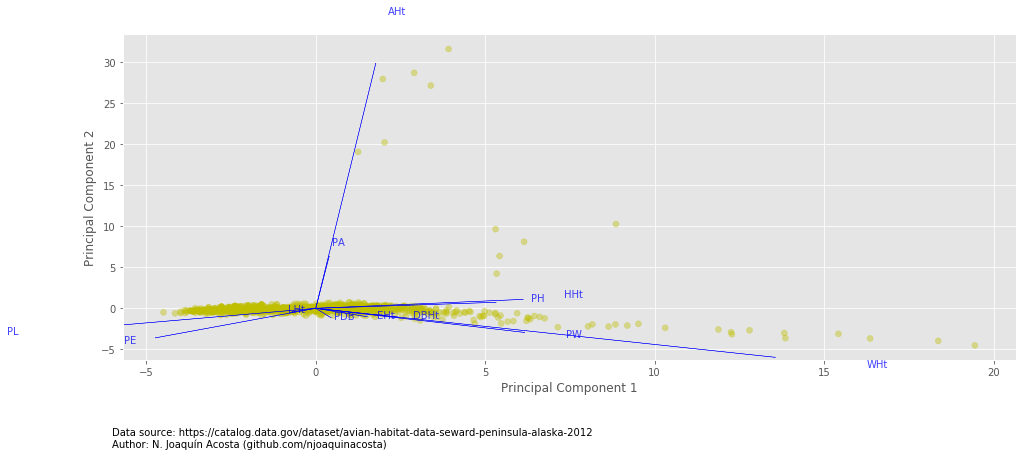

In [36]:
"""
Plot Data; note that AHt, WHt & PL, when compared to the others, are major outliers.
"""

ax = draw_vectors(T, pca.components_,avian_habitat_df.columns.values)
T_avian_habitat_df = pd.DataFrame(T)
T_avian_habitat_df.columns = ['component1', 'component2']

T_avian_habitat_df['color'] = 'y'
T_avian_habitat_df.loc[T_avian_habitat_df['component1'] > 125, 'color'] = 'r'
T_avian_habitat_df.loc[T_avian_habitat_df['component2'] > 125, 'color'] = 'b'

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(T_avian_habitat_df['component1'], T_avian_habitat_df['component2'], color=T_avian_habitat_df['color'], alpha=0.4)
plt.text(-6, -17, "Data source: https://catalog.data.gov/dataset/avian-habitat-data-seward-peninsula-alaska-2012"    
       "\nAuthor: N. Joaquín Acosta (github.com/njoaquinacosta)", fontsize=10)
plt.show()

In [ ]:
"""
DATASET SOURCE:

    https://catalog.data.gov/dataset/avian-habitat-data-seward-peninsula-alaska-2012

CITATIONS:

        Originator: Colleen M. Handel
        Publication_Date: 20130110
        
        Title:
            
            Changing Arctic Ecosystems: Forecasting Effects of Climate Change on the Distribution 
            and Abundance of Bird Populations across the Boreal-Arctic Transition Zone 
            Geospatial_Data_Presentation_Form: website
        
        Publication_Information:

            Publication Place: Anchorage, Alaska
            Publisher: U.S. Geological Survey, Alaska Science Center

        Other Citation_Details: Project website, containing information about the study.
        Online Linkage: http://alaska.usgs.gov/portal/project.php?project_id=289
"""